#### Disclaimer: While case study is real, data is modified for educational purposes. Description: This dataset represents the Stock Price of Google incorporation between 2013-2018 years. The data is presented in csv format as follows: Date, Open, High, Low, Close, Volume, Adj Close.
#### Dataset: google-data.csv
- Task: You are asked to create a model using Facebook Prophet predict closing stock prices for the
- next 100 days. Tune the hyperparameters using Bayesian Optimization.

#### Complete your work with following steps:
- 1. Name your final work script as “Google Stock Price Prediction”.
- 2. Create repository named “Time Series with Facebook Prophet” in your GitHub account and push your script to this repository.
- 3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

#### Note: Your pull requests should either fix problems or add new features.

Tapşırıq:

1. **Disclaimer**: Case study real olsa da, məlumatlar təhsil məqsədi üçün dəyişdirilib.
2. **Təsvir**: Bu dataset, Google şirkətinin 2013-2018 illəri arasındakı səhmlərinin qiymətini təmsil edir. Məlumat CSV formatında təqdim olunub və aşağıdakı sütunlardan ibarətdir: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, `Adj Close`.
3. **Dataset**: `google-data.csv`
4. **Tapşırıq**: Sizdən Facebook Prophet istifadə edərək sonrakı 100 gün üçün bağlanış qiymətlərini (closing stock prices) proqnozlaşdırmaq üçün model qurmağınız tələb olunur. Hiperparametrləri **Bayesian Optimization** ilə optimallaşdırın.

Tamamlamaq üçün addımlar:
- Son iş faylınızı "Google Stock Price Prediction" kimi adlandırın.
- GitHub hesabınızda "Time Series with Facebook Prophet" adlı repository yaradın və script-i bu repository-ə yükləyin.
- Digər istifadəçilərin repository-lərini fork edin, pull request-lər edin (ən az bir, üç pull request etmək məqbuldur).
- **Qeyd**: Pull request-lər ya problemləri həll etməli, ya da yeni xüsusiyyətlər əlavə etməlidir.

---

### Datasetin Sütunları:

- **Date**: Tarixi göstərir. (Format: YYYY-MM-DD)
- **Open**: Göstərilən tarixdə səhmin açılış qiymətini göstərir.
- **High**: Göstərilən tarixdə səhmin ən yüksək qiymətini göstərir.
- **Low**: Göstərilən tarixdə səhmin ən aşağı qiymətini göstərir.
- **Close**: Göstərilən tarixdə səhmin bağlanış qiymətini göstərir.
- **Volume**: Göstərilən tarixdə alınıb-satılan səhmlərin həcmini göstərir.
- **Adj Close**: Göstərilən tarixdə səhmin düzəliş edilmiş bağlanış qiymətini göstərir, dividentlər və digər korporativ tədbirlərlə düzəliş olunur.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from prophet import Prophet

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\google-data.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


### 1. Check the Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


### Fill Missing Days of Dates with Interpolate method

In [4]:
data = pd.DataFrame()
data['Date'] = pd.date_range (start = df.iloc[0, 0], end =df.iloc[-1, 0]) 
data = pd.merge(data, df, on= 'Date', how = 'left') 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in cols:
    data[col] = data[col].interpolate (method = 'cubic')

In [6]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,2013-01-05,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,2013-01-06,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06
5,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3.332900e+06
6,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3.373900e+06


### Difference Plot

<Axes: >

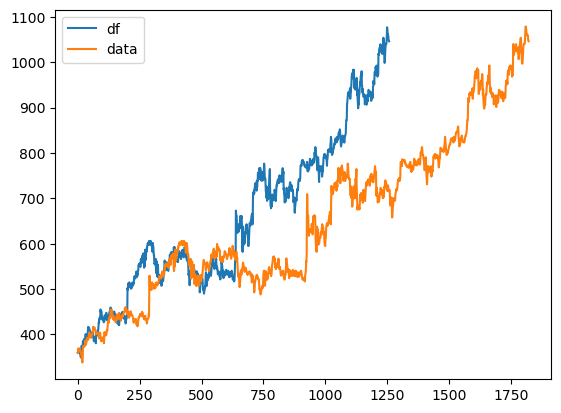

In [7]:
df.Close.plot(legend=True, label='df')
data.Close.plot(legend=True, label='data')

### Selection Feature

In [8]:
model_df = df[['Date', 'Close']].rename(columns={"Date": 'ds', "Close": 'y'})

In [9]:
model_df

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


### Creat Model

In [10]:
from prophet import Prophet

model = Prophet(interval_width=0.95)
model.fit(model_df)

19:43:16 - cmdstanpy - INFO - Chain [1] start processing
19:43:17 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [11]:
future = model.make_future_dataframe (periods = 100)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,369.448254,330.987796,419.904767,369.448254,369.448254,4.257883,4.257883,4.257883,2.825750,2.825750,2.825750,1.432133,1.432133,1.432133,0.0,0.0,0.0,373.706137
1,2013-01-03,369.786166,328.859332,414.492308,369.786166,369.786166,2.601769,2.601769,2.601769,2.041360,2.041360,2.041360,0.560409,0.560409,0.560409,0.0,0.0,0.0,372.387935
2,2013-01-04,370.124078,328.410108,419.175589,370.124078,370.124078,2.188428,2.188428,2.188428,2.460109,2.460109,2.460109,-0.271681,-0.271681,-0.271681,0.0,0.0,0.0,372.312506
3,2013-01-07,371.137815,327.074500,417.620197,371.137815,371.137815,-0.520767,-0.520767,-0.520767,1.926443,1.926443,1.926443,-2.447211,-2.447211,-2.447211,0.0,0.0,0.0,370.617047
4,2013-01-08,371.475727,326.102010,413.180217,371.475727,371.475727,-0.779856,-0.779856,-0.779856,2.265169,2.265169,2.265169,-3.045025,-3.045025,-3.045025,0.0,0.0,0.0,370.695871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2018-04-04,1104.075676,1045.389182,1151.433336,1073.611688,1135.301435,-3.963757,-3.963757,-3.963757,2.825750,2.825750,2.825750,-6.789507,-6.789507,-6.789507,0.0,0.0,0.0,1100.111919
1355,2018-04-05,1104.746517,1046.110917,1152.787992,1073.754920,1136.681512,-5.588749,-5.588749,-5.588749,2.041360,2.041360,2.041360,-7.630109,-7.630109,-7.630109,0.0,0.0,0.0,1099.157768
1356,2018-04-06,1105.417358,1043.859550,1155.419566,1073.992689,1137.890394,-5.940238,-5.940238,-5.940238,2.460109,2.460109,2.460109,-8.400347,-8.400347,-8.400347,0.0,0.0,0.0,1099.477120
1357,2018-04-07,1106.088199,1039.593318,1147.080479,1074.234742,1139.097724,-14.855087,-14.855087,-14.855087,-5.759416,-5.759416,-5.759416,-9.095671,-9.095671,-9.095671,0.0,0.0,0.0,1091.233112


### Forecast Plotting

<Figure size 1500x500 with 0 Axes>

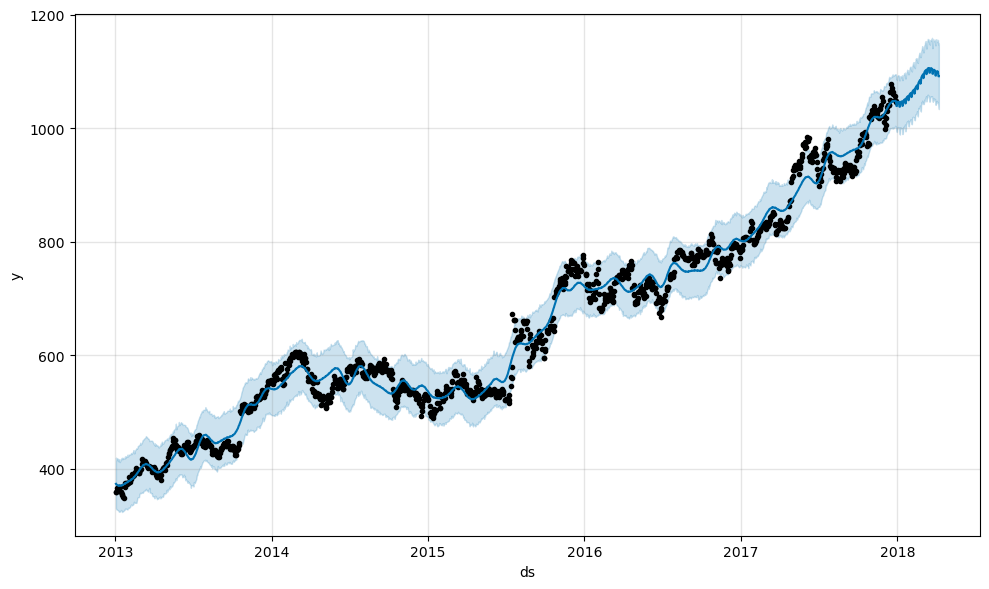

In [12]:
plt.figure(figsize=(15, 5)) 
model.plot(forecast)
plt.show()

### Plot Components

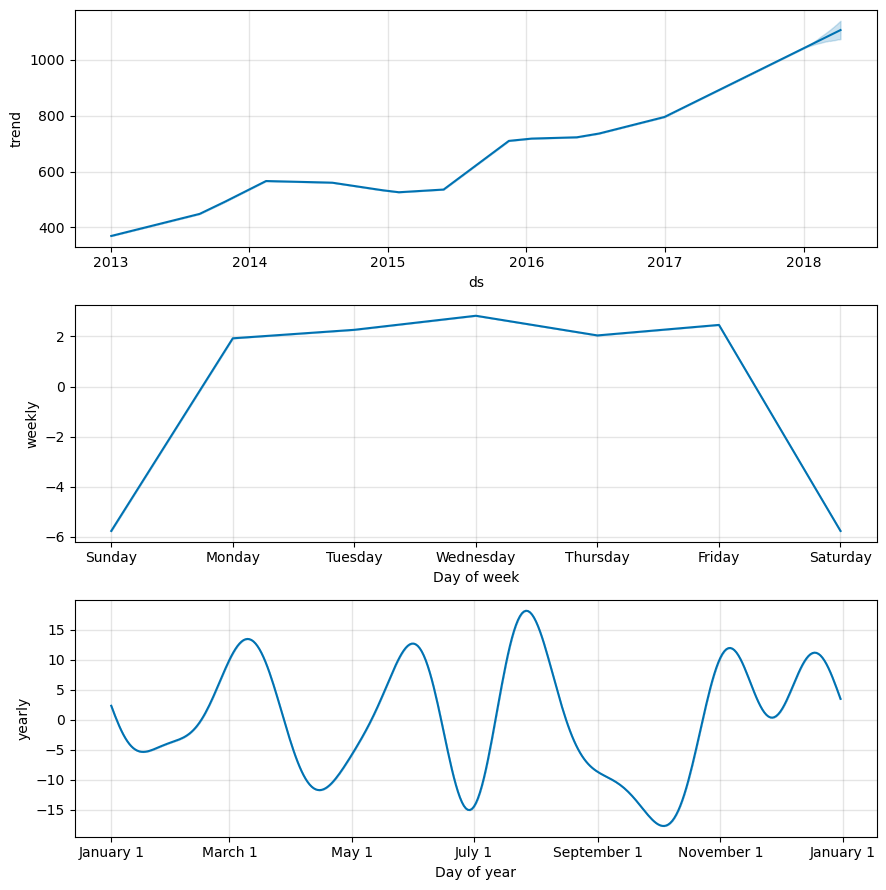

In [13]:
model.plot_components(forecast)
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_true = model_df['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat'][:len(model_df['y'])] # Proqnozlaşdırılan dəyərlər
    
#Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.9822087702088038
MAE: 19.230821515337514
MSE: 549.5438295309286
RMAE: 23.442351194599244


### ParameterGrid

In [15]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
            "seasonality_mode" : ['multiplicative', 'additive']
            }

parameter_grid = ParameterGrid(parameters)

In [16]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    model = Prophet(
                    changepoint_prior_scale=p['changepoint_prior_scale'], 
                    n_changepoints=p['n_changepoints'],
                    holidays_prior_scale=p['holidays_prior_scale'], 
                    seasonality_mode=p['seasonality_mode'], 
                    interval_width=0.95
                    )
    
    # Modeli öyrətmək
    model.fit(model_df)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(periods=100, freq='D')
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = model_df
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)


Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


19:43:26 - cmdstanpy - INFO - Chain [1] start processing
19:43:26 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004892230322548319
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


19:43:28 - cmdstanpy - INFO - Chain [1] start processing
19:43:28 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004762504186414828
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002620588674647874
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


19:43:34 - cmdstanpy - INFO - Chain [1] start processing
19:43:34 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002594173735284036
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


19:43:36 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004892230322548319
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


19:43:38 - cmdstanpy - INFO - Chain [1] start processing
19:43:38 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004762504186414828
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


19:43:40 - cmdstanpy - INFO - Chain [1] start processing
19:43:42 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002620588674647874
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


19:43:44 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002594173735284036
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


19:43:47 - cmdstanpy - INFO - Chain [1] start processing
19:43:47 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004896130153996498
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


19:43:49 - cmdstanpy - INFO - Chain [1] start processing
19:43:49 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0047660678114897935
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0026160834013539093
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


19:43:55 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002558255177982456
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.004896130153996498
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0047660678114897935
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


19:44:01 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.0026160834013539093
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


19:44:05 - cmdstanpy - INFO - Chain [1] start processing
19:44:05 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.002558255177982456
[[0.004892230322548319, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.004762504186414828, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.002620588674647874, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}], [0.002594173735284036, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}], [0.004892230322548319, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.004762504186414828, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.002620588674647874, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonal

In [17]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

,MPE,P
0,0.004892,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,0.004763,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,0.002621,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,0.002594,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,0.004892,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
5,0.004763,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
6,0.002621,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
7,0.002594,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
8,0.004896,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
9,0.004766,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."


In [18]:
parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

,MPE,P
11,0.002558,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
15,0.002558,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
3,0.002594,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
7,0.002594,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
10,0.002616,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
14,0.002616,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
2,0.002621,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
6,0.002621,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,0.004763,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
5,0.004763,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [19]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.002558255177982456
Parameters:  {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


### Creat Model

In [20]:
from prophet import Prophet

model = Prophet(interval_width=0.95, changepoint_prior_scale=0.2, holidays_prior_scale=0.1,\
                n_changepoints=5, seasonality_mode='additive')
model.fit(model_df)

19:45:36 - cmdstanpy - INFO - Chain [1] start processing
19:45:37 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [21]:
future = model.make_future_dataframe (periods = 100)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,357.079455,307.938876,426.298546,357.079455,357.079455,9.168614,9.168614,9.168614,0.086609,0.086609,0.086609,9.082005,9.082005,9.082005,0.0,0.0,0.0,366.248069
1,2013-01-03,357.579327,303.050978,428.181742,357.579327,357.579327,8.059757,8.059757,8.059757,-0.341575,-0.341575,-0.341575,8.401333,8.401333,8.401333,0.0,0.0,0.0,365.639084
2,2013-01-04,358.079199,308.327675,424.450436,358.079199,358.079199,7.305719,7.305719,7.305719,-0.439923,-0.439923,-0.439923,7.745643,7.745643,7.745643,0.0,0.0,0.0,365.384919
3,2013-01-07,359.578816,306.065313,430.066910,359.578816,359.578816,5.336342,5.336342,5.336342,-0.652090,-0.652090,-0.652090,5.988432,5.988432,5.988432,0.0,0.0,0.0,364.915158
4,2013-01-08,360.078688,304.113237,422.151485,360.078688,360.078688,5.054291,5.054291,5.054291,-0.432859,-0.432859,-0.432859,5.487150,5.487150,5.487150,0.0,0.0,0.0,365.132979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2018-04-04,1118.176685,1046.437326,1179.603984,1088.001324,1150.038238,-7.619688,-7.619688,-7.619688,0.086609,0.086609,0.086609,-7.706297,-7.706297,-7.706297,0.0,0.0,0.0,1110.556997
1355,2018-04-05,1118.897785,1040.621699,1176.661439,1088.006633,1151.164847,-9.065300,-9.065300,-9.065300,-0.341575,-0.341575,-0.341575,-8.723724,-8.723724,-8.723724,0.0,0.0,0.0,1109.832485
1356,2018-04-06,1119.618885,1037.243958,1177.719515,1088.033428,1152.438051,-10.115147,-10.115147,-10.115147,-0.439923,-0.439923,-0.439923,-9.675224,-9.675224,-9.675224,0.0,0.0,0.0,1109.503738
1357,2018-04-07,1120.339986,1042.007838,1177.349627,1088.373232,1154.005621,-9.664317,-9.664317,-9.664317,0.889919,0.889919,0.889919,-10.554237,-10.554237,-10.554237,0.0,0.0,0.0,1110.675668


### Forecast Plotting

<Figure size 1500x500 with 0 Axes>

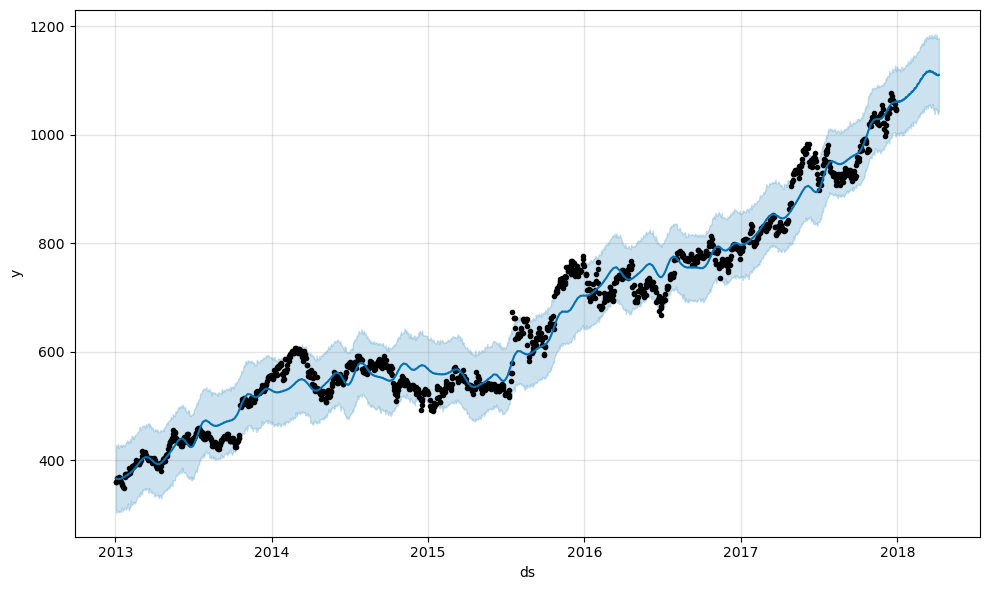

In [22]:
plt.figure(figsize=(15, 5)) 
model.plot(forecast)
plt.show()

### Plot Components

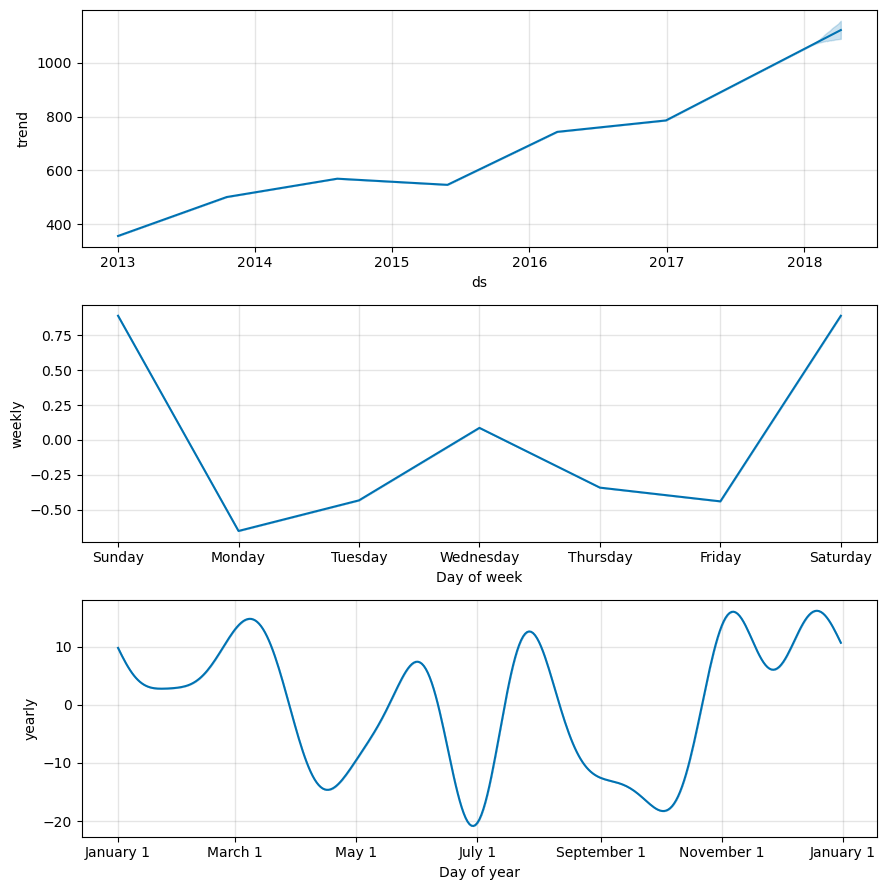

In [23]:
model.plot_components(forecast)
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_true = model_df['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat'][:len(model_df['y'])] # Proqnozlaşdırılan dəyərlər
    
#Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.9695948911189446
MAE: 24.3419995779326
MSE: 939.1672283423775
RMAE: 30.64583541596439
